# 6.5 Unsupervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\harip\Dairy data Analysis"

In [4]:
# Importing the dataset
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'Dairy Data cleaned.csv'), index_col = False)

In [5]:
df.shape

(4325, 26)

In [6]:
df.head()

,States,Total Land Area (acres),Number of Cows,Farm Size per sq.km,Date recording date,Product ID,Product Name,Brand,Quantity (liters/kg),Overall Prices,...,Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales categories,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data,Sales,Price flag
0,Madhya Pradesh,387.21,92,Large,01/01/2019,3,Cheese,Passion Cheese,714.67,88.78,...,89.54,27220.16,West Bengal,Wholesale,410,74.72,99.37,2019,Moderate Sales,Moderately priced
1,Uttar Pradesh,58.59,82,Small,01/01/2019,7,Lassi,Amul,963.16,89.01,...,92.35,39618.15,Rajasthan,Online,534,73.75,150.18,2019,Moderate Sales,Moderately priced
2,Telangana,984.43,95,Medium,01/01/2019,10,Ghee,Mother Dairy,564.08,79.42,...,77.21,32968.67,Kerala,Retail,137,27.65,33.44,2019,Moderate Sales,Moderately priced
3,Delhi,16.51,58,Large,01/01/2019,9,Paneer,Mother Dairy,592.76,64.76,...,63.47,14598.10,Chandigarh,Wholesale,362,88.03,57.12,2019,Low Sales,Moderately priced
4,Madhya Pradesh,987.38,71,Medium,01/01/2019,5,Ice Cream,Mother Dairy,355.40,75.69,...,72.41,8399.56,Maharashtra,Retail,239,65.49,42.61,2019,Low Sales,Moderately priced


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size per sq.km                  4325 non-null   object 
 4   Date recording date                  4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Overall Prices                       4325 non-null   float64
 10  Total Value of products available    4325 non-null   float64
 11  Shelf Life (days)             

In [8]:
# Removing the categorical values
df_new = df.drop(['States','Farm Size per sq.km','Product Name','Brand','Storage Condition','Customer Location', 'Sales categories', 'Sales','Price flag','Date recording date','Production Date','Expiration Date'], axis = 1, inplace = True)

In [9]:
df.head()

,Total Land Area (acres),Number of Cows,Product ID,Quantity (liters/kg),Overall Prices,Total Value of products available,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year of recording data
0,387.21,92,3,714.67,88.78,63448.4026,49,304,89.54,27220.16,410,74.72,99.37,2019
1,58.59,82,7,963.16,89.01,85730.8716,13,429,92.35,39618.15,534,73.75,150.18,2019
2,984.43,95,10,564.08,79.42,44799.2336,63,427,77.21,32968.67,137,27.65,33.44,2019
3,16.51,58,9,592.76,64.76,38387.1376,7,230,63.47,14598.10,362,88.03,57.12,2019
4,987.38,71,5,355.40,75.69,26900.2260,30,116,72.41,8399.56,239,65.49,42.61,2019


# The Elbow Technique

In [10]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [11]:
# Create a score that represents a rate of variation
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

E:\Users\harip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users\harip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users\harip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users\harip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Users\harip\anaconda3\lib\site-packages\sklearn\clust

[-2946354199531.336,
 -1108190393236.4622,
 -703603829389.627,
 -529783540378.90466,
 -400377501728.90137,
 -329280524597.1471,
 -273171329818.85168,
 -240325359827.0666,
 -212367736386.30804]

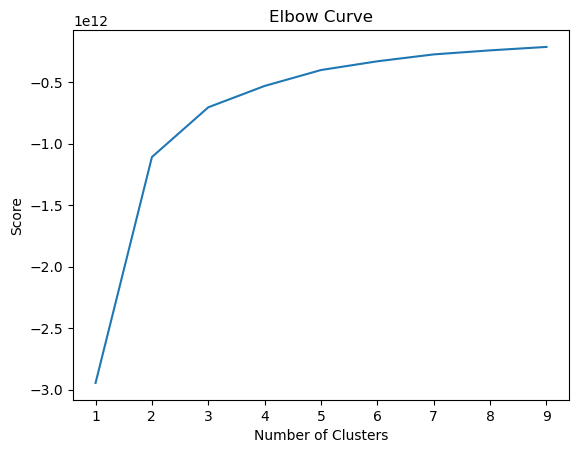

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From the elbow curve, its clear now that the optimal number of clusters is 3 as we see a area flatten in the line between 2 and 3.

# K- Means Clustering

In [13]:
kmeans = KMeans(n_clusters = 3)

In [14]:
kmeans.fit(df)

E:\Users\harip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
# Create a column in the dataframe with values of clusters
df['clusters'] = kmeans.fit_predict(df)

E:\Users\harip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df['clusters'].value_counts()

0    2281
2    1383
1     661
Name: clusters, dtype: int64

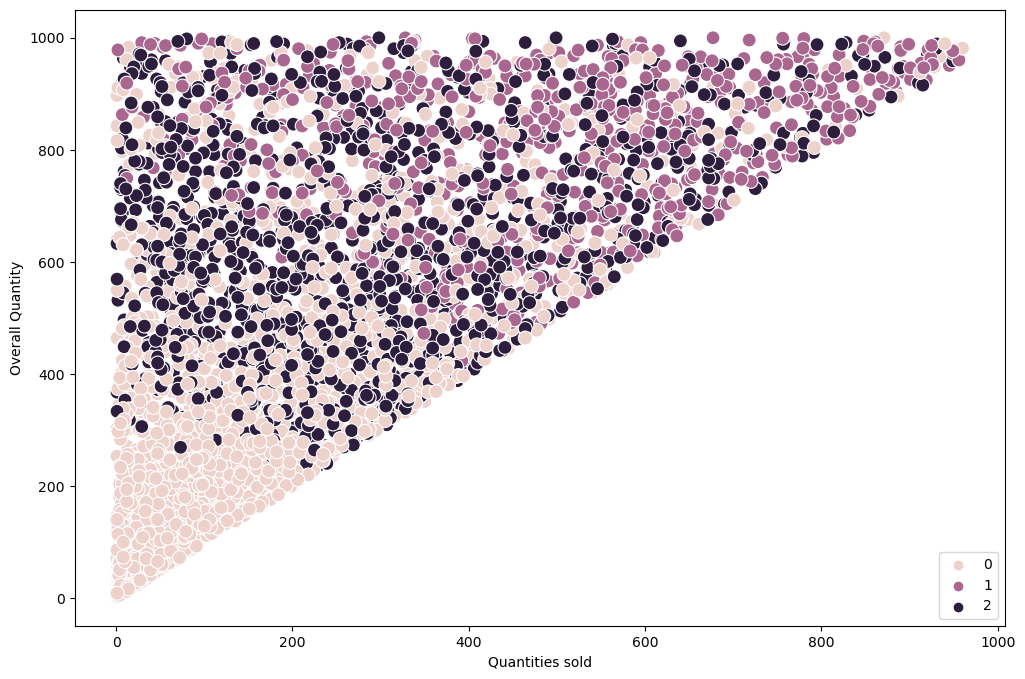

In [17]:
# Plot the clusters for the "Quantities sold" and "Overall Quantities (liters/kg)" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Quantity Sold (liters/kg)'], y = df['Quantity (liters/kg)'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Quantities sold')
plt.ylabel('Overall Quantity')
plt.show()

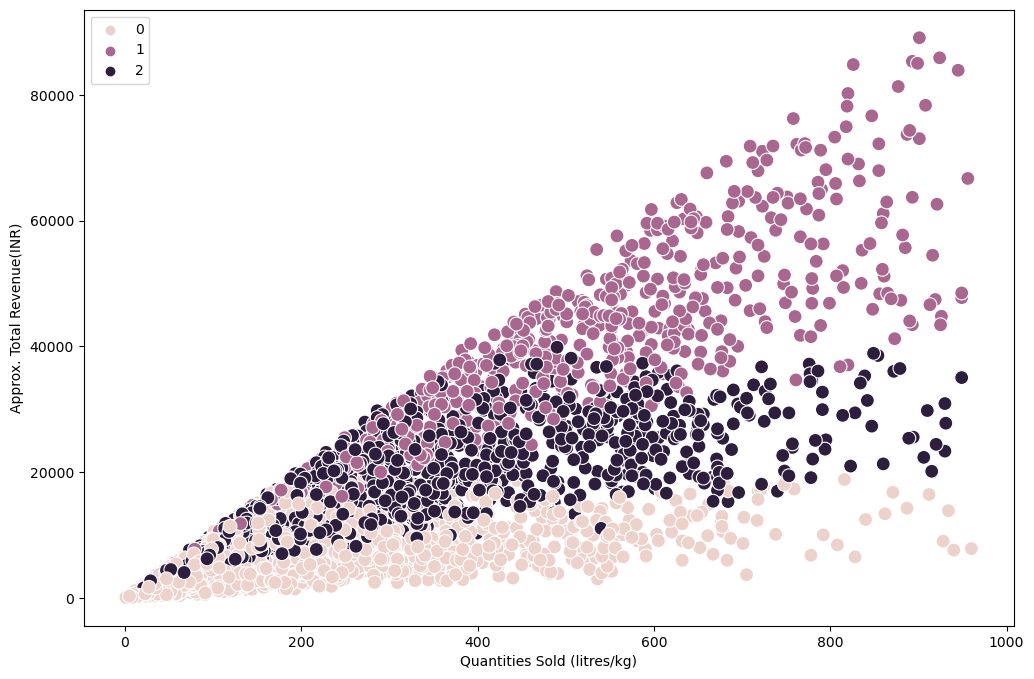

In [18]:
# Plot the clusters for the "Quantities sold" and "Approx. Total Revenue(INR)"
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Quantity Sold (liters/kg)'], y = df['Approx. Total Revenue(INR)'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Quantities Sold (litres/kg)')
plt.ylabel('Approx. Total Revenue(INR)')
plt.show()

### To check the performance of the dairy farm

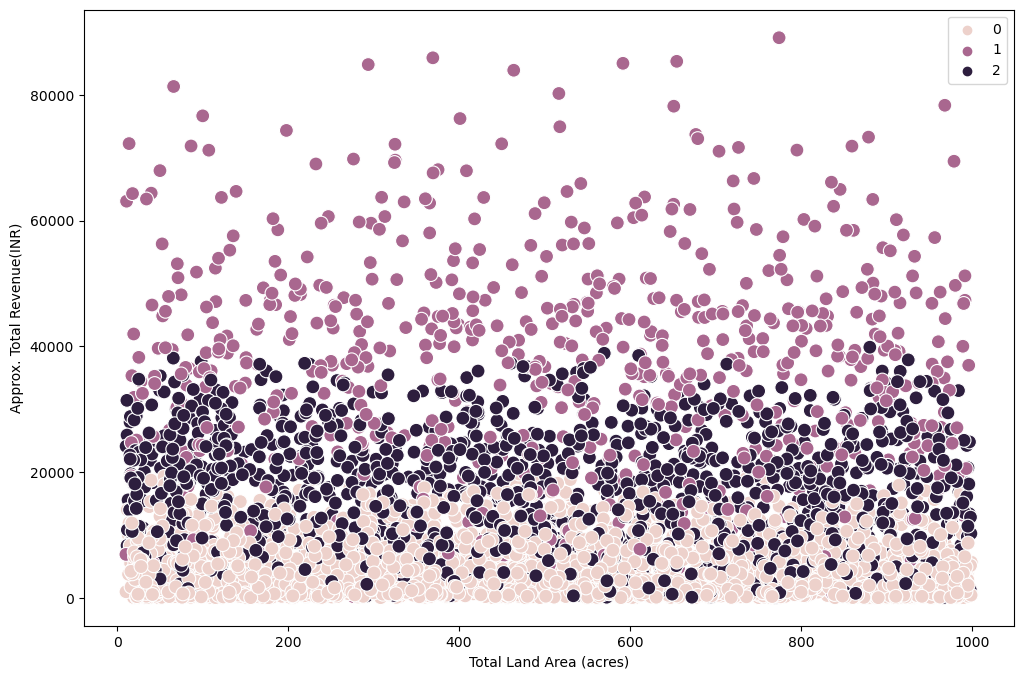

In [19]:
# To check the performance of the dairy farm
# Plot the clusters for the "Total Land area and Approx.Total Revenue"
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Total Land Area (acres)'], y = df['Approx. Total Revenue(INR)'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Approx. Total Revenue(INR)')
plt.show()

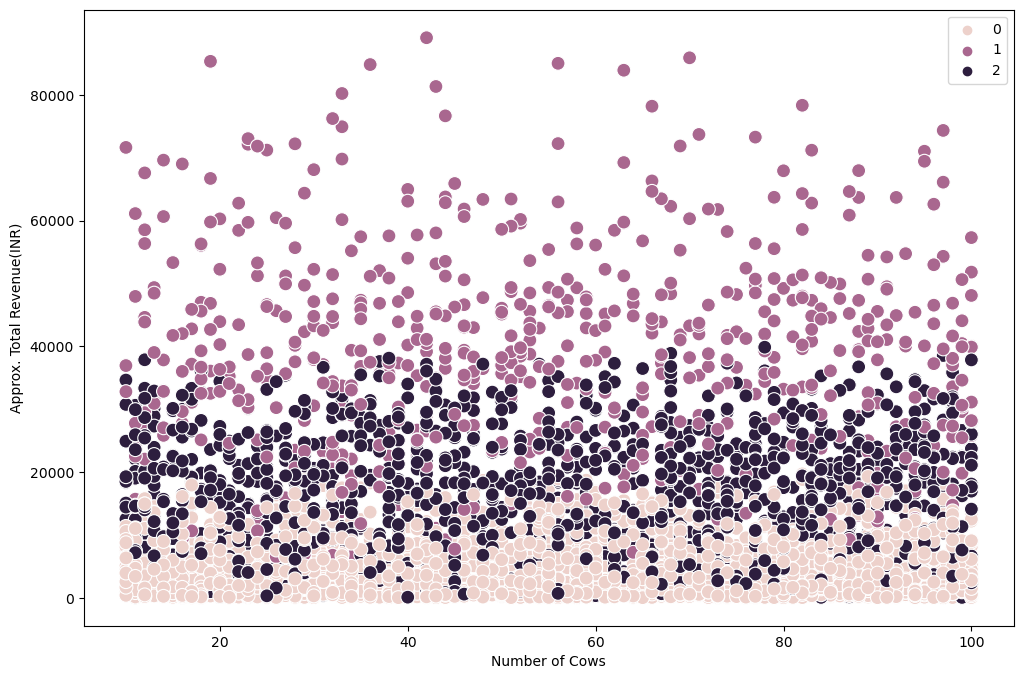

In [20]:

# Plot the clusters for the " Number of cows and approx. total revenue"
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Number of Cows'],  y = df['Approx. Total Revenue(INR)'], hue = kmeans.labels_, s = 100)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Cows')
plt.ylabel('Approx. Total Revenue(INR)')
plt.show()

### To check the impact of storage conditions and shelf life

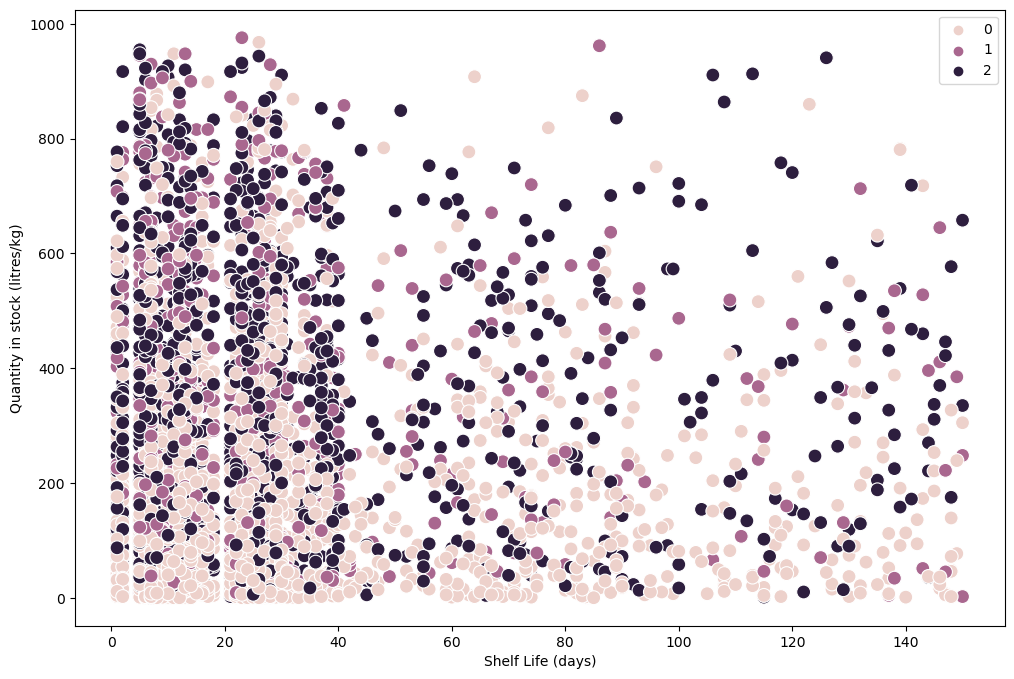

In [21]:

# Plot the clusters for the "Shelf life" and "Quantities in stock"
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Shelf Life (days)'], y = df['Quantity in Stock (liters/kg)'], hue = kmeans.labels_, s = 100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Shelf Life (days)')
plt.ylabel('Quantity in stock (litres/kg)')
plt.show()

#### OBSERVATIONS:
From the above charts,

The plot "Quantities sold and Overall Quantities (liters/kg)" shows dark purple clusters have performed so well indicating a high sales of product below 500l. 

The plot "Quantities sold and Approx. Total Revenue(INR)" has divided clusters quite well showing that with higher 'Quantities sold' the ' the total revenue' Increases as well.

The plot "Total Land area and Approx.Total Revenue" shows that the purple clusters performed so well, the pink clusters stayed between Rs.20000 to Rs.40000 and only the light purple clusters seen above Rs.40000

The plot  " Number of cows and approx. total revenue" shows that the dark purple cluster is not represented in the price above Rs.20000.

The plot "Shelf life" and "Quantities in stock" seems to have some values that are overlaping in dark purple,pink and purple clusters. It could mean that some most of the milk products shelf life stay between 0 to 40 days which is in the stock.

# Descriptive statistics

In [22]:
df.groupby('clusters').agg({'Quantity Sold (liters/kg)':['mean', 'median'], 
                            'Total Land Area (acres)':['mean', 'median'], 
                            'Number of Cows':['mean', 'median'],
                            'Quantity (liters/kg)':['mean', 'median'],
                            'Shelf Life (days)':['mean', 'median'],
                            'Approx. Total Revenue(INR)':['mean', 'median'],
                            'Quantity in Stock (liters/kg)':['mean', 'median']})

Quantity Sold (liters/kg)        Total Land Area (acres)          \
                              mean median                    mean  median   
clusters                                                                    
0                       153.878124  101.0              501.452131  503.22   
1                       481.727685  489.0              519.348169  532.80   
2                       291.824295  264.0              499.250065  505.80   

         Number of Cows        Quantity (liters/kg)         Shelf Life (days)  \
                   mean median                 mean  median              mean   
clusters                                                                        
0             55.095572   55.0           333.343481  273.84         29.365629   
1             54.895613   53.0           811.861256  840.00         27.043873   
2             54.778742   55.0           627.856811  619.82         29.731020   

                Approx. Total Revenue(INR)            \
         median                       mean    median   
clusters                                               
0          22.0                4912.087036   3750.03   
1          17.0               37922.446838  37885.36   
2          22.0               16242.545170  16200.25   

         Quantity in Stock (liters/kg)         
                                  mean median  
clusters                                       
0                           178.973257  113.0  
1                           329.641452  295.0  
2                           335.550253  297.0

# Next steps

The k means clustering model has provided me with some thoughtful insights which I can use in my main analysis. Mainly, in the shelf life which indicates that the most of the products has a shelf life of 40 days. But in few charts it wasn'nt that informative may be it would be more optimal if could involve the categorical columns to get moore valuable insight from the data. From the descriptive stats, now its clear that the pink(1) clusters has a high mean and median value in most of the columns when compared to the others.

In [23]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Clusters.csv'))